In [2]:
# RESULTS
#Best Model:Ridge
#Best Model parameters: {'alpha': 1000}
#train rmse: 29.450616192466786
#train r2: 0.20739869935831934
#test rmse: 30.865378961426195
#test r2: 0.18900655758665819
#CV:0.20

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import seaborn as sns
from math import sqrt

In [3]:
data = pd.read_csv("Patent.csv")


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 25 columns):
pat        65535 non-null int64
fwd        65535 non-null int64
lag_d      65535 non-null int64
lag_y      65535 non-null int64
noc        65535 non-null int64
gy         65535 non-null int64
ay         65535 non-null int64
noi        65535 non-null int64
UMC        65535 non-null int64
firm       65535 non-null int64
MSA        65535 non-null int64
tbm        65535 non-null int64
tbru       65535 non-null float64
PAG        65535 non-null float64
npr        65535 non-null int64
fpr        65535 non-null int64
FT         65535 non-null int64
Cent       65535 non-null float64
EXP_Y      65535 non-null float64
DT         65535 non-null float64
IT         65535 non-null float64
RT         65535 non-null float64
3rd_PT     65535 non-null float64
Rnd_Int    65535 non-null float64
FS         38808 non-null float64
dtypes: float64(10), int64(15)
memory usage: 12.5 MB


In [5]:
data.drop(columns=['lag_y'],inplace=True)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['fwd'], axis=1),
                                                    data['fwd'],
                                                    test_size=0.2,
                                                    random_state=0)

X_train.shape, X_test.shape

((52428, 23), (13107, 23))

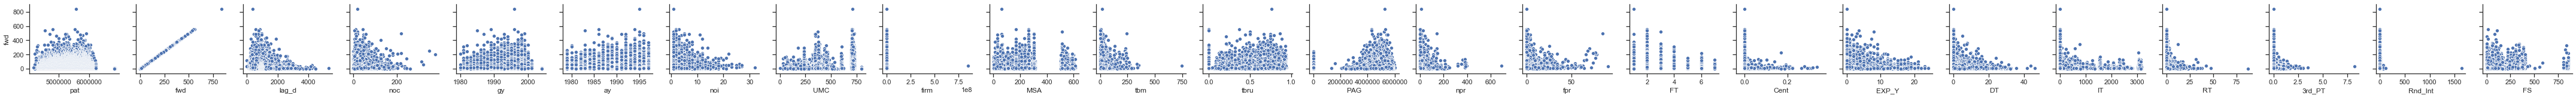

In [7]:
#double click the graph to vizualize
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, y_vars="fwd", x_vars=data.columns.values)


In [8]:
categorical=['gy','ay','firm','UMC','MSA','FT']

In [9]:
continuous=list(set(list(data.columns))-set(categorical))

In [10]:
X_train[categorical] = X_train[categorical].astype('O')
X_test[categorical] = X_test[categorical].astype('O')

In [11]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from sklearn.preprocessing import StandardScaler
from feature_engine.discretisers import DecisionTreeDiscretiser

In [12]:
patent_preprocess = Pipeline([
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                          variables=['FS'])),
    # categorical encoding 
     ('rare_label_enc', ce.RareLabelCategoricalEncoder(
         tol=0.001,n_categories=0, variables=categorical)),
    ('categorical_enc', ce.OneHotCategoricalEncoder(variables = categorical)),
    
     ('treeDisc',  DecisionTreeDiscretiser(cv=2, scoring='neg_mean_squared_error',
                                   regression=True,
                                   param_grid={'max_depth': [1,2,3,4,5,6]})),
    
    ('scaler', StandardScaler())
])

In [13]:
patent_preprocess.fit(X_train,y_train)


Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['FS'])),
                ('rare_label_enc',
                 RareLabelCategoricalEncoder(n_categories=0, tol=0.001,
                                             variables=['gy', 'ay', 'firm',
                                                        'UMC', 'MSA', 'FT'])),
                ('categorical_enc',
                 OneHotCategoricalEncoder(drop_last=False, top_categories=None,
                                          variables=['gy', 'ay', 'firm', 'UMC',
                                                     'MSA', 'FT'...
                                         scoring='neg_mean_squared_error',
                                         variables=['pat', 'lag_d', 'noc',
                                                    'noi', 'tbm', 'tbru', 'PAG',
                                                    'npr', 'fpr', 'Cent

In [14]:
# Apply Transformations
X_train=patent_preprocess.transform(X_train)
X_test=patent_preprocess.transform(X_test)

In [235]:
#Train a linear regression model, report the coefficients and model performance 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score



lr = LinearRegression().fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train)
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores))
print()
# Print Co-efficients
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

# Check test data set performance
print('train mse: {}'.format(mean_squared_error(y_train, train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, train_preds))))
print('train r2: {}'.format(r2_score(y_train, train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, test_preds))))
print('test r2: {}'.format(r2_score(y_test, test_preds)))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Mean Cross-validation scores: [0.19562722 0.20247955 0.18228693]

lr.coef_: [ 4.48322849e+00  1.02629916e+00  4.00190232e+00  2.36337870e+00
  2.11077883e+00  1.79006187e+00 -1.79774173e+00  2.80195945e+00
  9.12170419e-01  1.00730020e-01  7.24498938e-01  3.19623916e-01
 -5.22926155e-01  1.15693746e+00  3.18168246e-01  1.92333905e+00
  1.06988327e+00 -5.86407307e+13  9.71267332e+13 -7.32690334e+13
 -7.80320075e+13  1.17399810e+14 -6.60564320e+13 -3.74024387e+13
  1.18119478e+14 -5.34518637e+13 -5.52876992e+13 -3.90740352e+13
 -5.54542112e+13 -8.86293170e+13 -4.50874887e+13 -4.44129158e+13
  9.21401621e+13 -2.72951956e+13  3.89763719e+13  2.92448126e+13
 -3.34832284e+13 -2.26310792e+13  1.12935321e+13 -4.75267811e+13
  1.09079287e+14 -6.44913808e+13 -5.94097683e+13 -3.36615349e+13
  9.63315406e+13 -4.35484251e+13 -3.99310588e+13 -3.51064537e+13
 -5.17505946e+13 -7.00990433e+13 -8.07872000e+13 -3.61349237e+13
  1.03341702e+14 -5.65545023e+13 -2.54904868e+13 -2.86916299e+13
 -2.97360684e+

In [236]:

# Train a linear regression model with Hyperparameter tuning, report the coefficients and model performance 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

lr = LinearRegression().fit(X_train, y_train)
params_lr = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False], 'n_jobs':[1,3,5,7]}
grid_lr = GridSearchCV(lr, params_lr,cv=5, return_train_score = True,scoring='r2')
grid_lr.fit(X_train, y_train)
X_train_preds = grid_lr.predict(X_train)
X_test_preds = grid_lr.predict(X_test)
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print("Best parameters: {}".format(grid_lr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_lr.best_score_))


train mse: 868.017990899373
train rmse: 29.46214504918766
train r2: 0.20677802810787416

test mse: 954.2406585605789
test rmse: 30.89078598159294
test r2: 0.18767085992318722
Best parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}
Best cross-validation score: 0.20


In [238]:
# Train a linear regression SGD model , report the coefficients and model performance 
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
lr_sgd = Pipeline([('sgd_reg', SGDRegressor(max_iter=100, tol = 1e-5))])
params_sgd = {'sgd_reg__eta0':[0.0001,0.0005,0.001,0.005,0.01, 0.05, 0.1 ,0.5]}
grid_sgd = GridSearchCV(lr_sgd, params_sgd,cv=5, n_jobs=-1, return_train_score = True,scoring='neg_mean_squared_error')
grid_sgd.fit(X_train, y_train)
X_train_preds = grid_sgd.predict(X_train)
X_test_preds = grid_sgd.predict(X_test)
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print("Best parameters: {}".format(grid_sgd.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_sgd.best_score_))

train mse: 867.3193659815237
train rmse: 29.450286348039533
train r2: 0.2074164533948606

test mse: 952.4781473846217
test rmse: 30.862244691282935
test r2: 0.18917125625937015
Best parameters: {'sgd_reg__eta0': 0.0001}
Best cross-validation score: -879.21


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [239]:
# Train a linear regression SGD model with hyperparameter tuning , report the coefficients and model performance
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
lr_sgd = Pipeline([('sgd_reg', SGDRegressor(max_iter=100, tol = 1e-5))])
params_sgd = {'sgd_reg__loss':['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'sgd_reg__eta0': [0.0001,0.0005,0.001,0.005,0.01, 0.05, 0.1 ,0.5],'sgd_reg__fit_intercept':[True,False],
              'sgd_reg__shuffle':[True,False]}
grid_sgd = GridSearchCV(lr_sgd, params_sgd,cv=5, n_jobs=-1, return_train_score = True,scoring='neg_mean_squared_error')
grid_sgd.fit(X_train, y_train)
X_train_preds = grid_sgd.predict(X_train)
X_test_preds = grid_sgd.predict(X_test)
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print("Best parameters: {}".format(grid_sgd.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_sgd.best_score_))

train mse: 867.32049647688
train rmse: 29.450305541316204
train r2: 0.20741542031286797

test mse: 952.9412406710645
test rmse: 30.869746365512377
test r2: 0.18877703267669566
Best parameters: {'sgd_reg__eta0': 0.0005, 'sgd_reg__fit_intercept': True, 'sgd_reg__loss': 'squared_loss', 'sgd_reg__shuffle': True}
Best cross-validation score: -879.15


In [240]:
# Train a Ridge regression model, report the coefficients, the best parameters, and model performance 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
    
#define a list of parameters
param_ridge = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100,1000] }

grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, return_train_score = True)
grid_ridge.fit(X_train, y_train)
X_train_preds = grid_ridge.predict(X_train)
X_test_preds = grid_ridge.predict(X_test)
print()
# print co-eff

print("Ridge.coef_:", grid_ridge.best_estimator_.coef_)
print("Ridge.intercept_:", grid_ridge.best_estimator_.intercept_)

# Check test data set performance

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print("Best parameters: {}".format(grid_ridge.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_ridge.best_score_))


Ridge.coef_: [ 4.03202747e+00  1.17234786e+00  3.90726159e+00  2.42712217e+00
  2.14475564e+00  1.74148722e+00 -1.67418855e+00  2.74685809e+00
  9.26677069e-01  3.12277176e-01  4.98736678e-01  3.89068359e-01
 -4.23656924e-01  8.85301683e-01  2.21430680e-01  1.81497839e+00
  1.10824741e+00  6.65694312e-01  1.52146473e+00  7.38247315e-01
  5.72936768e-01  1.53066561e+00  1.19442537e+00 -8.26746867e-02
  3.27979208e-01  6.57521253e-01  8.26516572e-01  2.48297421e-01
  6.08175633e-01 -3.92633563e-02  6.61480701e-01  3.05892525e-01
 -1.74046458e-01  1.60425158e-01  8.87366902e-01  2.55877593e-02
  1.62566878e-01  7.67163924e-02  3.44174209e-01  3.33685281e-01
  8.40661909e-01  1.06369361e-01 -2.31246608e-01  5.87778904e-01
  4.31013686e-01  5.34114091e-01  4.51250228e-01  9.18956495e-01
  4.66481119e-01 -8.52761834e-02  1.05089241e-01  2.69359410e-01
  4.97181369e-01  1.54292865e-01  2.63548382e-01  1.72633279e-01
  3.33924277e-01  4.96960822e-01  2.17275754e-01  3.75532072e-01
  2.0719190

In [241]:
# Train a Ridge regression model with hyperparameter tuning, report the coefficients, the best parameters, and model performance
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
    
#define a list of parameters
param_ridge = {'alpha':[0.0001,0.001, 0.01, 0.1, 1, 10, 100],'fit_intercept':[True,False],
               'normalize':[True,False], 'copy_X':[True, False], 'max_iter':[10,100]}

grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, return_train_score = True)
grid_ridge.fit(X_train, y_train)
X_train_preds = grid_ridge.predict(X_train)
X_test_preds = grid_ridge.predict(X_test)
print()
# print co-eff

print("Ridge.coef_:", grid_ridge.best_estimator_.coef_)
print("Ridge.intercept_:", grid_ridge.best_estimator_.intercept_)

# Check test data set performance

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print("Best parameters: {}".format(grid_ridge.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_ridge.best_score_))


Ridge.coef_: [ 4.28109078e+00  1.14474567e+00  3.93472276e+00  2.45219117e+00
  2.15499057e+00  1.75246970e+00 -1.73057414e+00  2.76718099e+00
  9.25956702e-01  3.21852038e-01  4.91542584e-01  3.89772324e-01
 -4.38665895e-01  9.02230588e-01  2.24215421e-01  1.84571354e+00
  1.11503320e+00  6.71890712e-01  1.48896241e+00  7.34124300e-01
  5.79165810e-01  1.55444303e+00  1.19834938e+00 -1.05538274e-01
  3.16131645e-01  6.65010202e-01  8.31903113e-01  2.32077019e-01
  6.16837138e-01 -6.31644092e-02  6.53015723e-01  3.01464955e-01
 -1.96875408e-01  1.41891069e-01  8.73535187e-01  4.56538202e-02
  1.40686583e-01  6.29129174e-02  3.50286384e-01  2.94046197e-01
  7.69794379e-01  7.89541666e-02 -2.74247511e-01  5.83883085e-01
  4.04989131e-01  5.02213414e-01  4.25057606e-01  9.12671546e-01
  4.23122242e-01 -9.92213687e-02  1.09051197e-01  2.49629209e-01
  4.50322955e-01  1.07436025e-01  2.66361668e-01  1.73091492e-01
  3.36075147e-01  4.97897375e-01  2.03053983e-01  3.86603672e-01
  2.0352731

In [242]:
# Train a Lasso regression model, report the coefficients, the best parameters, and model performance 



from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0)

#define a list of parameters
param_lasso = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100] }

grid_lasso = GridSearchCV(lasso, param_lasso, cv=5, return_train_score = True)
grid_lasso.fit(X_train, y_train)
X_train_preds = grid_lasso.predict(X_train)
X_test_preds = grid_lasso.predict(X_test)
# print co-eff

print("Lasso.coef_:", grid_lasso.best_estimator_.coef_)
print("Lasso.intercept_:", grid_lasso.best_estimator_.intercept_)

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print("Best parameters: {}".format(grid_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_lasso.best_score_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 965681.5938255526, tolerance: 4603.123197036386
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 956815.361121174, tolerance: 4561.085997730196
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 970502.5201195888, tolerance: 4623.784037871345
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9

Lasso.coef_: [ 5.24095203e+00  1.06634721e+00  3.96757243e+00  2.46873035e+00
  2.16735037e+00  1.75985405e+00 -1.74509909e+00  2.78184768e+00
  9.15487390e-01  3.03693538e-01  4.85746325e-01  3.81985835e-01
 -4.14410007e-01  9.09579457e-01  2.18581642e-01  1.85060451e+00
  1.12610482e+00  2.69494240e-01  1.56453387e+00  2.26129040e-01
  1.47121948e-01  1.95026949e+00  7.28459319e-01 -2.44266655e-01
  6.71813262e-01  3.41522719e-01  5.22085971e-01  5.14997460e-02
  2.57288640e-01 -5.64270214e-01  4.31516938e-01  6.54875213e-02
  9.28769368e-02  4.73490621e-02  8.80723245e-01  1.36844424e-01
  1.29518693e-02  0.00000000e+00  3.66205405e-01  1.56016677e-01
  7.30286606e-01  0.00000000e+00 -3.63110770e-01  4.14663539e-01
  4.27912296e-01  3.56175446e-01  2.73981993e-01  7.56523679e-01
  2.97669663e-01 -1.53928481e-01  4.24245396e-02  9.91655426e-02
  4.37083005e-01 -0.00000000e+00  9.25824275e-02 -0.00000000e+00
  1.54248997e-01  3.20483463e-01  6.03750422e-01  2.59118198e-01
  1.56681204

In [243]:
#Train a Lasso regression model with hyperparameter tuning, report the coefficients, the best parameters, and model performance 

from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0)

#define a list of parameters
param_lasso = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100],'fit_intercept':[True,False], 'normalize':[True,False],'copy_X':[True,False],
               'max_iter':[100],'selection':['random','cyclic'], 'warm_start':[True,False],
               'precompute':[True,False], 'positive':[True,False]}
grid_lasso = GridSearchCV(lasso, param_lasso, cv=5, return_train_score = True)
grid_lasso.fit(X_train, y_train)
X_train_preds = grid_lasso.predict(X_train)
X_test_preds = grid_lasso.predict(X_test)
# print co-eff

print("Lasso.coef_:", grid_lasso.best_estimator_.coef_)
print("Lasso.intercept_:", grid_lasso.best_estimator_.intercept_)

#Model Performance
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print("Best parameters: {}".format(grid_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_lasso.best_score_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4540453.736389004, tolerance: 4603.123197036386
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4616223.187454522, tolerance: 4561.085997730196
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4347131.26375176, tolerance: 4623.784037871345
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might wan

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 968113.6477800757, tolerance: 4603.123197036386
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33588.55212171376, tolerance: 4561.085997730196
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 965373.2944081463, tolerance: 4623.784037871345
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12914481.639611054, tolerance: 4603.123197036386
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10764251.85423873, tolerance: 4561.085997730196
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12180255.764415253, tolerance: 4623.784037871345
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1742096.6774507985, tolerance: 7538.556600000001
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2827844.2721913904, tolerance: 7623.1
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1746541.923757501, tolerance: 7558.6356000000005
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to in

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24267419.166788116, tolerance: 7623.1
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19480130.75300133, tolerance: 7558.6356000000005
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16268856.842921093, tolerance: 7580.3765
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9768919.895546027, tolerance: 7558.6356000000005
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13203502.655231185, tolerance: 7580.3765
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5811045.388344988, tolerance: 7587.1785
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10907440.78637

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11095325.127044704, tolerance: 7580.3765
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7473937.591950163, tolerance: 7587.1785
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9767749.458998118, tolerance: 7538.556600000001
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9333037.1035702

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5811045.388423175, tolerance: 7587.1785
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10907440.786372121, tolerance: 7538.556600000001
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7717482.860588662, tolerance: 7623.1
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4616223.187454522, tolerance: 4561.085997730196
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4347131.26375176, tolerance: 4623.784037871345
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4651125.238108389, tolerance: 4571.540584383569
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might wan

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33588.55212171376, tolerance: 4561.085997730196
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 965373.2944081463, tolerance: 4623.784037871345
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 955893.3347618729, tolerance: 4571.540584383569
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10764251.85423873, tolerance: 4561.085997730196
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12180255.764415253, tolerance: 4623.784037871345
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11361475.252908062, tolerance: 4571.540584383569
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2827844.2721913904, tolerance: 7623.1
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1746541.923757501, tolerance: 7558.6356000000005
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1738770.2600383386, tolerance: 7580.3765
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19480130.75300133, tolerance: 7558.6356000000005
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16268856.842921093, tolerance: 7580.3765
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5811045.388423175, tolerance: 7587.1785
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13203502.655231185, tolerance: 7580.3765
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7473937.59194243, tolerance: 7587.1785
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9767749.459013313, tolerance: 7538.556600000001
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1754332.5674355924, tolerance: 7587.1785
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1742096.6773381308, tolerance: 7538.556600000001
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2827844.27218277, tolerance: 7623.1
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1746541.9237024337

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17412472.779491384, tolerance: 7538.556600000001
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24267419.16679395, tolerance: 7623.1
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19480130.752999384, tolerance: 7558.6356000000005
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16268856

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178414.62511841953, tolerance: 4623.784037871345
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 966651.8610470034, tolerance: 4571.540584383569
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 966289.7161584534, tolerance: 4589.100886407745
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might w

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2396137.065413531, tolerance: 4571.540584383569
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2254981.2640590444, tolerance: 4589.100886407745
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2428347.938025467, tolerance: 4603.123197036386
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might w

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 963985.4083814137, tolerance: 4571.540584383569
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1013091.0266536176, tolerance: 4589.100886407745
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1018218.1481772661, tolerance: 4603.123197036386
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 367708.7763852179, tolerance: 7558.6356000000005
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293241.61279609054, tolerance: 7580.3765
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439081.06611501426, tolerance: 7587.1785
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499295.367764

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1912837.8657894954, tolerance: 7580.3765
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1943250.0977884904, tolerance: 7587.1785
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1751085.3332546428, tolerance: 7538.556600000001
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439081.0661154613, tolerance: 7587.1785
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499295.3677631095, tolerance: 7538.556600000001
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269745.5189318061, tolerance: 7623.1
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1752718.4857961535, tolerance: 7538.556600000001
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38228.1187454015, tolerance: 7623.1
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1757294.2235998511, tolerance: 7558.6356000000005
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1749968.2

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2365295.220347494, tolerance: 7623.1
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4369916.430650495, tolerance: 7558.6356000000005
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3599927.957259126, tolerance: 7580.3765
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1943250.097782515,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178414.62511841953, tolerance: 4623.784037871345
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 966651.8610470034, tolerance: 4571.540584383569
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 966289.7161584534, tolerance: 4589.100886407745
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might w

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2396137.065413531, tolerance: 4571.540584383569
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2254981.2640590444, tolerance: 4589.100886407745
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1018218.1481764652, tolerance: 4603.123197036386
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1013091.0266536176, tolerance: 4589.100886407745
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439081.0661154613, tolerance: 7587.1785
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499295.3677631095, tolerance: 7538.556600000001
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1765040.7179607302, tolerance: 7587.1785
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1752718.4857961535, tolerance: 7538.556600000001
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38228.1187454015, tolerance: 7623.1
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1757294.2235998511

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3319173.435709372, tolerance: 7538.556600000001
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2365295.220347494, tolerance: 7623.1
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4369916.430650495, tolerance: 7558.6356000000005
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3599927.95

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38228.118745438755, tolerance: 7623.1
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1757294.2236040756, tolerance: 7558.6356000000005
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1749968.2842493579, tolerance: 7580.3765
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4369916.430648491, tolerance: 7558.6356000000005
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3599927.9572589695, tolerance: 7580.3765
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2943322.773301758, tolerance: 7587.1785
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1912837.8657721132, tolerance: 7580.3765
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1943250.097782515, tolerance: 7587.1785
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1751085.3332521096, tolerance: 7538.556600000001
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1784687.580187

Lasso.coef_: [ 5.29080830e+00  1.06293378e+00  3.96703076e+00  2.46900611e+00
  2.16501457e+00  1.76133562e+00 -1.74274561e+00  2.78204064e+00
  9.16486613e-01  3.04255877e-01  4.86029946e-01  3.82604762e-01
 -4.13317251e-01  9.10264450e-01  2.18862408e-01  1.85139905e+00
  1.12691843e+00  3.94858291e-01  1.33000724e+00  3.81144176e-01
  3.14123639e-01  1.68957977e+00  8.68289260e-01 -1.58300373e-01
  4.11187545e-01  4.63642316e-01  6.51143626e-01  1.42617960e-01
  3.80072432e-01 -3.82290197e-01  5.37653476e-01  1.68988471e-01
 -8.68943853e-02  1.01378558e-01  7.85164110e-01  7.45572213e-02
  8.80956352e-02  3.36731828e-02  3.43402864e-01  1.46908562e-01
  7.08601018e-01  0.00000000e+00 -3.63216705e-01  4.04599759e-01
  3.98782107e-01  3.45371306e-01  2.62998771e-01  7.46042946e-01
  2.90737793e-01 -1.43244729e-01  6.26882985e-02  8.85667464e-02
  4.13776901e-01 -0.00000000e+00  1.03385879e-01 -0.00000000e+00
  1.49495022e-01  3.12220992e-01  4.09254487e-01  3.13526430e-01
  1.73854408

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2931374.0995690078, tolerance: 5737.16422886244
  tol, rng, random, positive)


In [244]:
# Train a polynomial regression model, the best parameters, and model performance 
from sklearn.preprocessing  import PolynomialFeatures
pipe_poly=Pipeline([ 
    ('polynomialfeatures', PolynomialFeatures()),
    ('norm_reg', LinearRegression())    
])
param_poly = {'polynomialfeatures__degree':range(1,2)}
grid_poly = GridSearchCV(pipe_poly, param_poly,cv=5, n_jobs=-1, return_train_score = True,scoring='neg_mean_squared_error')
grid_poly.fit(X_train, y_train)
X_train_preds = grid_poly.predict(X_train)
X_test_preds = grid_poly.predict(X_test)

#Model Performance
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_poly.best_score_))

train mse: 867.5262665413534
train rmse: 29.453798847370322
train r2: 0.20722738119615702

test mse: 952.8508118524462
test rmse: 30.868281647225622
test r2: 0.1888540132201334
Best parameters: {'polynomialfeatures__degree': 1}
Best cross-validation score: -880.72


In [ ]:
# Train a polynomial regression model with regularization, the best parameters, and model performance 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
pipe_poly=Pipeline([  
    ('polynomialfeatures', PolynomialFeatures(degree=2))
    ,('norm_reg',LinearRegression())
])
    
param_poly = [{'norm_reg':[LinearRegression()]},
              {'norm_reg':[Lasso()],'norm_reg__alpha':[0.01,0.1,1]},
              {'norm_reg':[Ridge()],'norm_reg__alpha':[0.01,0.1,1]}
             ]
grid_poly = GridSearchCV(pipe_poly, param_poly,cv=5, return_train_score = True,scoring='r2')

 

grid_poly.fit(X_train, y_train)
X_train_preds = grid_poly.predict(X_train)
X_test_preds = grid_poly.predict(X_test)

#Model Performance
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_poly.best_score_))

In [22]:
# Train a Elastic model with hyperparameter tuning, the best parameters, and model performance 
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
elasticnet = ElasticNet()

param_elasticnet = {'alpha':[0.0001, 0.01, 0.1, 1, 10], 'l1_ratio' :[0.1,0.3,0.5,0.7],
                   }

grid_elasticnet = GridSearchCV(elasticnet , param_elasticnet, cv=5, return_train_score = True)
grid_elasticnet.fit(X_train, y_train)
X_train_preds = grid_elasticnet.predict(X_train)
X_test_preds = grid_elasticnet.predict(X_test)

#Model Performance
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print("Best parameters: {}".format(grid_elasticnet.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_elasticnet.best_score_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14848609.670239046, tolerance: 4603.123197036386
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14767756.228713013, tolerance: 4561.085997730196
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14844519.670221105, tolerance: 4623.784037871345
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

train mse: 869.1027315645022
train rmse: 29.480548359291117
train r2: 0.20578675818212777

test mse: 954.0086338461796
test rmse: 30.887030188190312
test r2: 0.18786837868853612
Best parameters: {'alpha': 0.1, 'l1_ratio': 0.5}
Best cross-validation score: 0.20


In [ ]:
# Train a KNN regression model with hyperparameter tuning, the best parameters, and model performance 
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor()
param_knn = {'n_neighbors': range(1,25), 'weights': ['uniform','distance']}
grid_knn = GridSearchCV(knnreg, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)
X_train_preds = grid_knn.predict(X_train)
X_test_preds = grid_knn.predict(X_test)

#Model Performance
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print("Best parameters: {}".format(grid_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_knn.best_score_))

In [ ]:
# Train a SVM model, the best parameters, and model performance 
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

In [ ]:
# Train a SVM model with different kernels using gridsearch, the best parameters, and model performance 
from sklearn.svm import SVC
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['poly'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel': ['sigmoid'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
svc = SVC()
grid_svc = GridSearchCV(svc, param_grid, cv=5, n_jobs=2, return_train_score=True)
grid_svc.fit(X_train, y_train)
X_train_preds = grid_svc.predict(X_train)
X_test_preds = grid_svc.predict(X_test)

#Model Performance
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print("Best parameters: {}".format(grid_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc.best_score_))

In [14]:
# Train a Decision Tree model, the best parameters, and model performance 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))


Accuracy on training set: 0.998
Accuracy on test set: 0.029


In [19]:
# Train a Decision Tree model with hyperparameter tuning, the best parameters, and model performance 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(random_state=0)
param_DT = {'criterion':['gini','entropy'],"max_depth": range(1,10)
           }
grid_tree = GridSearchCV(tree,param_DT,cv=5)
grid_tree.fit(X_train,y_train)
X_train_preds = grid_tree.predict(X_train)
X_test_preds = grid_tree.predict(X_test)

#Model Performance
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print("Best parameters: {}".format(grid_tree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_tree.best_score_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


train mse: 1404.5666819256885
train rmse: 37.477549038400156
train r2: -0.2835369367594518

test mse: 1494.3009842069123
test rmse: 38.6561894682716
test r2: -0.2720734781389271
Best parameters: {'criterion': 'entropy', 'max_depth': 5}
Best cross-validation score: 0.04
